In [1]:
#https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd
import pandas as pd
from matplotlib import pyplot

headers = ['time_utc', 'external_mapping_id', 'active_power_watt','possible_power_watt','wind_speed','rpm','active_stop','control_state_id','online_data_expired','wind_direction','temperature','active_stop_user_id','received_time_utc']

parse_dates = ['time_utc', 'received_time_utc']
df = pd.read_csv("../../AssetsData/new_online_data.csv", sep=',', names=headers, parse_dates=parse_dates, skiprows=1)
data = df[['time_utc','active_power_watt']]
data.set_index('time_utc', inplace=True)
data.sort_index(axis=0, inplace=True)
data.head()

C:\Users\chmel\AppData\Local\Temp\ipykernel_3868\2162207576.py:7: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../online_data/new_online_data.csv", sep=',', names=headers, parse_dates=parse_dates, skiprows=1)
C:\Users\chmel\AppData\Local\Temp\ipykernel_3868\2162207576.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_index(axis=0, inplace=True)


active_power_watt
time_utc                                  
2022-02-21 19:21:29.791            74900.0
2022-02-21 19:21:29.791            52800.0
2022-02-21 19:21:29.791            37100.0
2022-02-21 19:21:29.791            59300.0
2022-02-21 19:21:33.118          1042700.0

In [2]:
data.dropna(axis=0, inplace=True)

C:\Users\chmel\AppData\Local\Temp\ipykernel_3868\2505677585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0, inplace=True)


<AxesSubplot:xlabel='time_utc'>

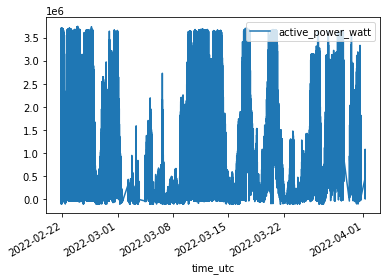

In [3]:
from pmdarima.arima import auto_arima
data.plot()

In [4]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(data)

(0.01, False)

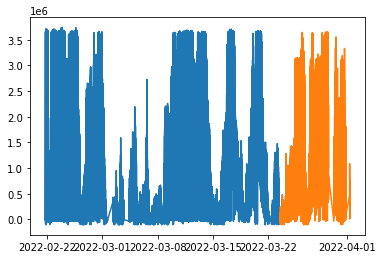

In [5]:
train = data[:(int(len(data)*0.85))]
test = data[(int(len(data)*-0.20)):]
pyplot.plot(train)
pyplot.plot(test)


In [7]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=2, max_d=2, max_q=2, start_P=0, D=1, start_Q=0, max_P=2, max_D=2, max_Q=2, m=1, seasonal=True, error_action='warn', trace=True, suppress_warnings=True, stepwise=True, random_state=20, n_fits=5)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18064118.452, Time=7.63 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18010459.282, Time=9.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17935631.303, Time=41.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18064116.452, Time=5.86 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17863356.221, Time=110.73 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=17862557.969, Time=131.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=18007666.219, Time=14.19 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17847242.058, Time=174.92 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17852219.985, Time=139.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=17847240.059, Time=153.47 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=17852217.981, Time=118.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=17862555.900, Time=115.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=17863354.151, Time=88.58 sec

Best model:  ARIMA(2,1,2)(0,0

In [8]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:               602849
Model:               SARIMAX(2, 1, 2)   Log Likelihood            -8923615.030
Date:                Wed, 06 Apr 2022   AIC                       17847240.059
Time:                        14:20:22   BIC                       17847296.606
Sample:                             0   HQIC                      17847255.944
                             - 602849                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4183      0.026    -16.272      0.000      -0.469      -0.368
ar.L2          0.2868      0.010     28.805      0.000       0.267       0.306
ma.L1         -0.1964      0.026     -7.700      0.000      -0.246      -0.146
ma.L2         -0.7851      0.025    -31.091      0.000      -0.835      -0.736
sigma2      4.725e+11   5.06e-14   9.34e+24      0.000    4.73e+11    4.73e+11
===================================================================================
Ljung-Box (L1) (Q):                  46.27   Jarque-Bera (JB):            344014.05
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.25e+40. Standard errors may be unstable.
"""

In [23]:
prediction = pd.DataFrame(arima_model.predict(n_periods=len(test)), index=test.index)
prediction.columns=['predicted power']
print(prediction.head(50))
print(prediction.tail(50))

                         predicted power
time_utc                                
2022-03-23 12:33:29.159    781761.937216
2022-03-23 12:33:31.166    686516.963012
2022-03-23 12:33:31.166    654293.653058
2022-03-23 12:33:31.166    640452.960164
2022-03-23 12:33:31.166    636999.676995
2022-03-23 12:33:59.715    634474.188356
2022-03-23 12:33:59.715    634540.057924
2022-03-23 12:33:59.715    633788.113925
2022-03-23 12:33:59.715    634121.536851
2022-03-23 12:34:01.408    633766.388156
2022-03-23 12:34:01.408    634010.579157
2022-03-23 12:34:01.408    633806.568816
2022-03-23 12:34:01.408    633961.945812
2022-03-23 12:34:30.293    633838.436686
2022-03-23 12:34:30.293    633934.666243
2022-03-23 12:34:30.293    633858.988143
2022-03-23 12:34:30.293    633918.245149
2022-03-23 12:34:31.661    633871.751716
2022-03-23 12:34:31.661    633908.196196
2022-03-23 12:34:31.661    633879.616080
2022-03-23 12:34:31.661    633902.024261
2022-03-23 12:35:00.859    633884.453482
2022-03-23 12:35

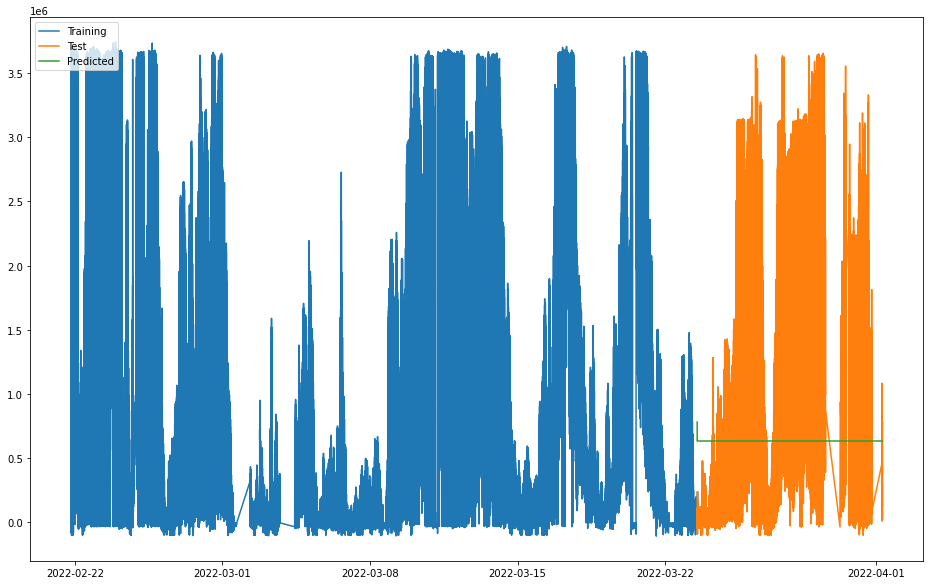

In [27]:
pyplot.figure(figsize=(16,10))
pyplot.plot(train,label="Training")
pyplot.plot(test,label="Test")
pyplot.plot(prediction,label="Predicted")
pyplot.legend(loc='upper left')
pyplot.show()